In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, cheby1

import librosa


y, fs = librosa.load("inputs/505.wav", sr=None)

y = librosa.to_mono(y)

print(f"Sound clip is {len(y)/fs} seconds long")
print(fs)
window_size = int(fs* 0.25)

print(window_size)

# f0 = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
# print(f0)

Sound clip is 8.256417233560091 seconds long
44100
11025


[ 8.27780387e-06  0.00000000e+00 -3.31112155e-05  0.00000000e+00
  4.96668232e-05  0.00000000e+00 -3.31112155e-05  0.00000000e+00
  8.27780387e-06] [  1.          -7.70121417  25.96020907 -50.03033249  60.29136697
 -46.52381732  22.44893677  -6.19298225   0.74783342]
(364108,)
57


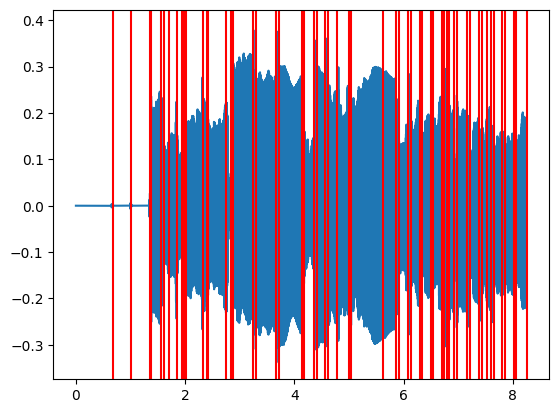

In [9]:

order = 4
low = 120.0
high= 900.0
b,a = butter(order, [low, high], fs=fs, btype='band')
# b, a = cheby1(order, 0.5, [low, high], fs=fs, btype='band')
print(b, a)



# fft_frequencies = np.fft.rfftfreq(len(y), 1/fs)
# sound_fft = np.fft.rfft(y)  

# sound_fft_abs = np.abs(sound_fft)

# low = 60.0

# is_higher = sound_fft_abs > low

# freq_higher_than_low =  is_higher * sound_fft


# signal_without_noise = np.fft.irfft(freq_higher_than_low)

y[np.abs(y) < 0.04] = 0

filtered_sound = lfilter(b, a ,y)
y = filtered_sound



# maxim = np.max(y)
# y = y/maxim
# print(maxim)
onset_frames = librosa.onset.onset_detect(y=y)
onset_samples = librosa.frames_to_samples(onset_frames)


print(y.shape)

print(len(onset_samples))

time_disc = np.linspace(0, len(y)/ fs, num=len(y))
plt.plot(time_disc,y)
# plt.plot(time_disc, filtered_sound, color="red")
# y = filtered_sound




for sample in onset_samples:
    plt.axvline(x=sample/fs, color="red")

# for sample in onset_samples:
#     plt.axvline(x = sample/fs, color= 'red')

# for i in range(len(onset_samples)-5):
#     plt.figure(figsize=(10,6))
#     start = onset_samples[i]
#     end = onset_samples[i+1]
#     plt.plot(time_disc[start:end+1], y[start:end+1])
#     plt.axvline(x = start/fs, color= 'red')
#     plt.axvline(x = end/fs, color= 'red')

plt.show()

6308.128083388147


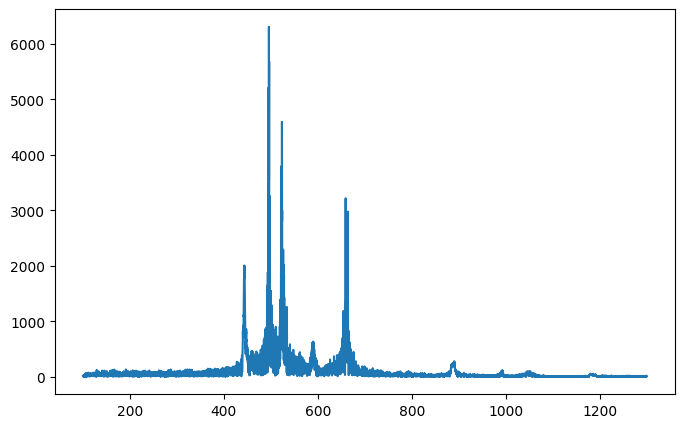

In [10]:
fft_frequencies = np.fft.rfftfreq(len(y), 1/fs)
sound_fft = np.fft.rfft(y)  

maxim = np.max((np.abs(sound_fft)))

print(maxim)
# maxim = np.max(np.abs(sound_fft))
# thresholding 

plt.figure(figsize=(8,5))
plt.plot(np.where((fft_frequencies > 100) & (fft_frequencies < 1300), fft_frequencies, None) , np.abs(sound_fft))
# plt.plot(fft_frequencies , np.abs(sound_fft))




# plt.figure(figsize=(8,6))
# plt.plot(np.where((fft_frequencies > 100) & (fft_frequencies < 1000), fft_frequencies, None) , np.abs(sound_fft)/maxim)




In [11]:

# envelope  


def find_fundamental_frequency(fft, fft_frequencies):
    thrershold = 0.035
    notes = []
    for j in range(len(fft)):
        amplitude = np.abs(fft[j])/maxim
        freq = round(fft_frequencies[j], 2)
        if amplitude > 0.15 or amplitude < thrershold:
            continue
        if amplitude > thrershold: 
            notes.append([freq, round(amplitude,2)])

    if notes == []:
        return None
    for n in notes:
        print(librosa.hz_to_note(n[0]), n[1], end=" || ")
    # print()
    return min(notes, key = lambda x: x[0])
notes = []

overtones = []

for i in range(0, len(onset_samples) -1):
    window = y[onset_samples[i]-50: onset_samples[i+1]+50]
    if len(window)/fs < 0.05:
        continue
    fft_frequencies = np.fft.rfftfreq(len(window), 1/fs)
    fft = np.fft.rfft(window)
    notes_from_sequence = find_fundamental_frequency(fft, fft_frequencies)
    if notes_from_sequence != None:
        print(i)
        # print(librosa.hz_to_note(notes_from_sequence[0]))

final_window = y[onset_samples[-1]:]
fft_frequencies = np.fft.rfftfreq(len(final_window), 1/fs)
fft = np.fft.rfft(final_window)
notes_from_sequence = find_fundamental_frequency(fft, fft_frequencies)
if notes_from_sequence != None:
    print(i)


print(notes)    


E5 0.12 || 3
D5 0.06 || 6
C5 0.06 || C5 0.06 || C5 0.05 || 10
B4 0.05 || B4 0.07 || B4 0.08 || B4 0.08 || B4 0.08 || 13
A4 0.12 || A4 0.08 || A4 0.04 || A5 0.04 || A5 0.04 || 16
B4 0.04 || B4 0.09 || B4 0.07 || B4 0.05 || B4 0.05 || 18
C5 0.04 || C5 0.07 || C5 0.1 || C5 0.05 || C5 0.04 || 20
C5 0.05 || 22
C5 0.12 || C5 0.07 || 24
C5 0.09 || C5 0.09 || C5 0.04 || 26
C5 0.04 || C5 0.13 || 27
B4 0.1 || B4 0.05 || 29
B4 0.05 || B4 0.04 || 32
B4 0.04 || B4 0.07 || 34
B4 0.04 || B4 0.07 || 36
B4 0.05 || B4 0.07 || 38
E5 0.06 || 42
E5 0.1 || E5 0.06 || 44
E5 0.08 || 46
E5 0.05 || 48
E5 0.04 || 49
E5 0.06 || 51
E5 0.05 || E5 0.06 || 53
E5 0.04 || E5 0.1 || 55
[]
